![SegmentLocal](Images_StudIP/Logo2.png)

*Neural Time Series Data*
# Chapter 6.1: Simple Time Series Data


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-0.1">Prerequisites</a></span></li><li><span><a href="#Scope-of-this-Chapter" data-toc-modified-id="Scope-of-this-Chapter-0.2">Scope of this Chapter</a></span></li></ul></li><li><span><a href="#1.-The-Math-behind-EEG-signals" data-toc-modified-id="1.-The-Math-behind-EEG-signals-1">1. The Math behind EEG signals</a></span><ul class="toc-item"><li><span><a href="#Simple-signals" data-toc-modified-id="Simple-signals-1.1">Simple signals</a></span></li><li><span><a href="#1.1-Simple-Sinewave-[1,5-pt]" data-toc-modified-id="1.1-Simple-Sinewave-[1,5-pt]-1.2">1.1 Simple Sinewave [1,5 pt]</a></span></li><li><span><a href="#1.2-More-complex-signal-[2-pts]" data-toc-modified-id="1.2-More-complex-signal-[2-pts]-1.3">1.2 More complex signal [2 pts]</a></span></li></ul></li><li><span><a href="#2.-How-to-get-rid-of-unwanted-noise?" data-toc-modified-id="2.-How-to-get-rid-of-unwanted-noise?-2">2. How to get rid of unwanted noise?</a></span><ul class="toc-item"><li><span><a href="#The-Fourier-Transform" data-toc-modified-id="The-Fourier-Transform-2.1">The Fourier Transform</a></span></li><li><span><a href="#2.1-Extracting-the-frequency-spectrum-with-the-FFT-[0,5-pts]" data-toc-modified-id="2.1-Extracting-the-frequency-spectrum-with-the-FFT-[0,5-pts]-2.2">2.1 Extracting the frequency spectrum with the FFT [0,5 pts]</a></span></li><li><span><a href="#Filtering-EEG-Data" data-toc-modified-id="Filtering-EEG-Data-2.3">Filtering EEG Data</a></span></li><li><span><a href="#2.2-Filtering-in-the-time-domain-vs.-filtering-in-the-frequency-domain-[5]" data-toc-modified-id="2.2-Filtering-in-the-time-domain-vs.-filtering-in-the-frequency-domain-[5]-2.4">2.2 Filtering in the time-domain vs. filtering in the frequency-domain [5]</a></span></li><li><span><a href="#2.2.-a)-Filter-in-the-time-domain-[3-pts]" data-toc-modified-id="2.2.-a)-Filter-in-the-time-domain-[3-pts]-2.5">2.2. a) Filter in the time domain [3 pts]</a></span></li><li><span><a href="#2.2-b)-Filter-in-the-frequency-domain-[2-pts]" data-toc-modified-id="2.2-b)-Filter-in-the-frequency-domain-[2-pts]-2.6">2.2 b) Filter in the frequency domain [2 pts]</a></span></li></ul></li><li><span><a href="#3.-BONUS:-Time-Frequency-Analysis" data-toc-modified-id="3.-BONUS:-Time-Frequency-Analysis-3">3. BONUS: Time-Frequency Analysis</a></span></li><li><span><a href="#Further-reading" data-toc-modified-id="Further-reading-4">Further reading</a></span></li><li><span><a href="#Summary:-What-you-have-learned-about-Neural-Time-Series-Data" data-toc-modified-id="Summary:-What-you-have-learned-about-Neural-Time-Series-Data-5">Summary: What you have learned about Neural Time Series Data</a></span></li></ul></div>

### Prerequisites
For this chapter, you should be familiar with the following concepts and techniques:
* Basic Python programming
* Basic Math skills (check out our tutorials section to recap your skills in Linea Algebra, Sine Waves and Euler's Formula)

### Scope of this Chapter

In this Chapter, you will learn the conceptual, mathematical, and implementational (via python programming) bases of time- and time-frequency-analysis of EEG recordings. Alternating between theoretical background knowledge and practical exercises you will learn the basics of how EEG Data is recorded, preprocessed and analysed. We will however only cover the **fundamental basics of EEG analysis**, but with this, you will then be able to dig deeper into the endless opportunities of Neural Time Series analysis.

*In order to successfully complete this worksheet, make sure you watched the video **"Analysing Neural Time Series Data" on studIP**, which provides you with the theoretical background.*


## 1. The Math behind EEG signals

Before we are ready to work with real EEG data, we will first create artificial signals. This makes it much easier to understand the *maths* behind EEG signals, which in return will help you to understand the following  analysis steps a lot better.

Step by step, we will make our signal more complex until it approximates *'real'* EEG data. In the next section, we will then start to use this knowledge in order to analyse EEG Data, recorded by a Neurobiopsychology research group of our institute.

For the following exercises, we will use the signal processing toolbox from scipy. [This link](https://docs.scipy.org/doc/scipy/reference/signal.html) leads you to the documentation of the toolbox, where you can find almost all the functions that you need to solve the following tasks. Whenever you are working with a toolbox, I highly recommend to take some time to explore the corresponding documentation. It really helps you to make the most of all the tools it supplies!

*For more interactive plots, uncomment the follwing line:*

In [4]:
%matplotlib qt5 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import signal

### Simple signals

One of the key concepts you need in order to understand the *maths* behind oscillatory signals (like neural signals in EEG) is the **sine wave**. Here you can find a short overview of the parameters that define a sine wave (more details have been covered in the video "Analysing Neural Time Series Data" in Chapter 6.1. on studIP). 


<span style=color:#1F618D;font-size:11pt>→ If you need to catch up a little on the maths, [here](https://www.youtube.com/watch?v=F21S9Wpi0y8&t=200s) is a very good recap-tutorial on trigonometry.</span>

![SineUrl](https://media.giphy.com/media/U6prF59vkch44/giphy.gif "Sine")

![SegmentLocal2](Images_StudIP/sinewave.jpg)

With the parameters of ```amplitude```,```frequency``` and ```phase```($\theta$), a sine wave can be described by the following formula:

$$Asin(2*\pi ft + \theta)$$

### 1.1 Simple Sinewave [1,5 pt]
With this information, we are now ready to create a simple signal as a combination of two sinusoids. 

For this:  
- Define a time scale of 1 second, i.e. 1000ms
- Create two sinewaves with a length of 1s: one with a frequency of 10Hz and one with 20Hz (*for simplicity, we will for now ignore amplitude and phase, they will be used in the next step though*)
- Add them together to create your first simple signal
- Create a plot for each of the sinusoids

In [6]:
# ToDo
t = np.linspace(0, 1, 1000, False)
sin1 = np.sin(2*np.pi*10*t) # 10Hz
sin2 = np.sin(2*np.pi*20*t) # 20Hz
sig = sin1 + sin2

# plot all three figures
fig, axes = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize = (12, 8))
fig.add_subplot(111, frameon = False)

plt.tick_params(labelcolor = 'None', top = False, bottom = False, left = False, right = False)
plt.xlabel('Time [ms]',fontsize = 12)
plt.ylabel('Amplitude',fontsize = 12)
plt.subplots_adjust(hspace=0.2)

axes[0].plot(t, sin1)
axes[0].set_title('10 Hz sinusoid', fontsize = 14)
axes[1].plot(t, sin2)
axes[1].set_title('20 Hz sinusoid', fontsize = 14)
axes[2].plot(t, sig)
axes[2].set_title('Signal composed of 10 and 20 Hz Sinusoids', fontsize = 14)


Text(0.5, 1.0, 'Signal composed of 10 and 20 Hz Sinusoids')

<span style=color:#1F618D;font-weight:bold;font-size:11pt>Q1: Is the resulting signal symmetrical?</span>


### 1.2 More complex signal [2 pts]

As a next step, we want to achieve something more 'complex'.

For this, we select a list of frequencies, that we want our signal to be composed of, and define their amplitudes and phases. The exact values that you should use for this are already predefined.
With the help of these parameters:
- Create a new, a bit more complex signal by combining the resulting sinusoids (you should get 5 sinusoids with the respective ```frequ```, ```amplit``` and ```phase```)
- To make it more realistic, create some random Gaussian noise with the same length and add it to your signal
- Then plot both, the clean and the noisy signal

The Nyquist Frequency ```nyq``` given below results from  <span style=color:#7D6608;font-weight:bold;font-size:11pt>the Nyquist Sampling Theorem</span> which was mentioned in the intro-video:


<div class="alert alert-block alert-warning">
<b>The Nyquist Sampling Theorem states:</b> In order to prevent distortions of the underyling information, the minimum sampling frequency of a signal (in our case 1000Hz) should be double the frequency of its highest frequency component (i.e. 500Hz).
</div>


In [7]:
# set parameters:
srate = 1000 # define sampling rate (signal length = 1s)
nyq = srate/2 #nyquist frequency
frex = [3, 10, 5, 15, 35, 60] # define a list of frequencies
amplit = [5, 15, 10, 5, 7, 1] # define their amplitudes
phases = [np.pi/7, np.pi/8, np.pi, np.pi/2, -np.pi/4, np.pi/3] # and their respective phases

In [8]:
a = [np.array([1,2]),np.array([3,4]),np.array([5,6])]
print(a)
type(sum(a))

[array([1, 2]), array([3, 4]), array([5, 6])]


numpy.ndarray

In [9]:
# ToDo
# 1. create signal

t = np.linspace(0, 1, 1000, False)
sig = []

for i in range(len(frex)):
    sine = amplit[i] * np.sin(2*frex[i]*t*np.pi + phases[i])
    sig.append(sine)


# 2. add some random noise
# info: the second paramter defines the size of your noise
noise = np.random.normal(0, 2.0, 1000)

signal_final = sum(sig)
signal_noisy = sum(sig) + noise

# 3. plot both figures (signal with and without noise)

fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (15, 8))
fig.add_subplot(111, frameon = False)
plt.tick_params(labelcolor = 'none', top = False, bottom = False, left = False, right = False)
plt.xlabel('Time [s]', fontsize = 12)
plt.ylabel('Amplitude', fontsize = 12)

axes[0].plot(t, signal_final)
axes[0].set_title('Signal without noise', fontsize = 14)
axes[1].plot(t, signal_noisy)
axes[1].set_title('Noisy signal', fontsize = 14)


Text(0.5, 1.0, 'Noisy signal')

 <span style=color:#1F618D;font-weight:bold;font-size:11pt>Q1: Does the noisy signal show a higher amplitude than the clean one? </span>
 
 <span style=color:#1F618D;font-weight:bold;font-size:11pt>Q2: At approximately what time-points can you see the maxima of your signal?</span>

In reality, your EEG signal is roughly based on the same components: it typically contains a mixture of simultaneous neural oscillations at different frequencies plus some noise. This noise can be non-neural (caused by line noise or muscle activity); but also neural oscillations that are not of your interest can be considered as 'noise'. In order to be able do your analysis as "clean" as possible, you want to isolate only the part of the signal that you are interested in, thereby increasing the **signal-to-noise-ratio (SNR)** of your signal (see intro-video). A way to do this, is by filtering your data - this will be the focus of the following exercises.

## 2. How to get rid of unwanted noise?

### The Fourier Transform

Before telling you more about how EEG data can be filtered, you need to learn about the **Fourier Transform (FT)**, which is a really useful mathematical tool for EEG time series data; with its help we can separate the different frequency components that compose our signal and thus get rid of unwanted frequencies. This finally enables us to separate the noise components from our signal via filtering techniques. For this, watch the following video by 3Blue1Brown. It is a good intro to the Fourier Transform, giving you a really intuition about what it does.

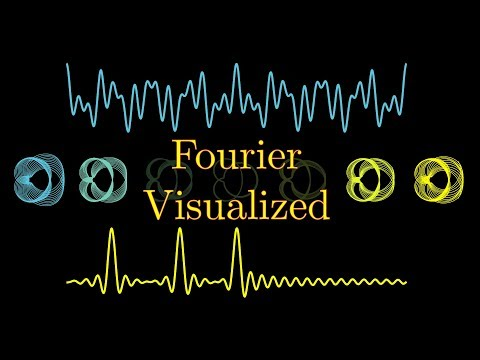

In [10]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('spUNpyF58BY')

<span style=color:#1F618D;font-size:11pt>→ If you want to have a more thorough, EEG-based intro, [here](https://www.youtube.com/watch?v=lZ7y7pEAJcU&list=PLn0OLiymPak28kNU6D_nkUBebb5LRj3E5) is a very good playlist by Mike X. Cohen.</span>

### 2.1 Extracting the frequency spectrum with the FFT [0,5 pts]
Now we are ready to apply the **fast Fourier Transform** [```fft.fft()```](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html) on our signals, in order to get its frequency spectrum. Since we created the signal on our own, we can check whether it shows all the frequencies that we used to compose it. 
* We will have to compute the frequency spectrum several times, therefore it is useful to write a proper function that can compute the fourier transform of any signal. 
* Then apply and plot the FFT of the noisy signal from 1.2. You will see a lot more, if you limit your x-axis to 100, since we are not interested in higher frequencies anyway.


If you look at the amplitudes, you will realize that they are half the amplitudes that we predefined when creating the signal. This happens because we are only taking the absolute values of the FT-frequencies. 

<span style=color:#1F618D;font-size:11pt>→ In case you want to have a proper explanation for why this is the case, watch [this video!](https://www.youtube.com/watch?v=Nupda1rm01Y)</span>

In [17]:
def getFT(sig):
    
    # ToDo
    # compute fft
    n = len(sig)
    FFT = np.fft.fft(sig)
    FFT = np.abs(FFT) # why abs?
    
    
    return FFT

In [20]:
# compute and plot FFT of the noisy signal
frequencies = getFT(signal_noisy)
N = int(len(signal_noisy))
plt.plot(frequencies[:N]/len(signal_noisy))
plt.suptitle('Fourier Transform of the Signal')
plt.title('Frequencies {} plus random Gaussian noise'.format(frex), fontsize = 8)
plt.xlim(0, 100)
plt.xlabel('Frequ(Hz)')
plt.ylabel('Amplitude')

plt.show()



(0.0, 100.0)

<span style=color:#1F618D;font-weight:bold;font-size:11pt>Q1: If you look at the higher frequencies (> 60Hz), are their amplitudes equal to zero? Why is this? </span>

In [22]:
int(len(signal_noisy))

1000

### Filtering EEG Data

Now that we have learned about the fundamental basics of EEG and the magic behind the Fourier Transform, we will have a short look into how EEG data is filtered, i.e. how we can improve the ratio between signal and noise in our data. This knowledge will be important for the second half of the Notebook.

*Note that this video will only work, if you have the folder "Videos_ACC" in the same folder as this notebook!*

In [83]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="Videos_StudIP/Filtering_Intro.m4v" type="video/mp4">
</video></div>

In [23]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="https://video4.virtuos.uni-osnabrueck.de/static/mh_default_org/engage-player/2c8dcd4e-52ca-4d95-9e9a-0368f4dc879b/644f20f6-6efb-4fde-93f3-3926227c1cc4/Filtering_Intro.mp4?cid=1442f39ad2b95c7dee8a7641faf015d9" type="video/mp4">
</video></div>

### 2.2 Filtering in the time-domain vs. filtering in the frequency-domain [5]  

In this part, we will learn about the two ways a filter can be applied to your data. Usually, you only filter in the frequency domain since this is computationally a lot faster. Yet, it is really useful to understand both procedures in order to understand the concept of filtering. In the video about filtering you already got a first impression of filtering in the frequency domain. In order to better understand its time-domain equivalent, you need to first learn about the process of convolution, i.e. the (mathematical) procedure of applying your filter to your data in the time domain:

<div class="alert alert-block alert-success">
<b>Convolution:</b> Convolution is used to isolate frequency-band-specific activity and to localize that frequency-band-specific activity in time.  
This is done by <b>convolving wavelets— time-limited sine waves—with EEG data.</b> As the wavelet (i.e. the convolution kernel) is dragged along the EEG data (the convolution signal): it reveals when and to what extent the EEG data contain features that look like the wavelet. When convolution is repeated on the same EEG data using wavelets of different frequencies, a time-frequency representation can be formed."

<span style=font-style:italic>(Mike X Cohen, "Analyzing Neural Time Series Data: Theory and Practice"</span>
</div>

<div class="alert alert-block alert-success">
<b>Convolution theorem:</b> Convolution in the time domain is the same as multiplication in the frequency domain.  
</div>


![SegmentLocal](Images_StudIP/Convolution_Theorem.png)

<span style=color:#1F618D;font-size:11pt>→ If you want a more thorough explanation of convolution, I can highly recommend [this video](http://mikexcohen.com/lectures.html) by Mike X Cohen.</span>


### 2.2. a) Filter in the time domain [3 pts]
According to the figure above, in order to filter our signal in the time domain, we use a windowed sinewave as a filter-kernel. The windowing helps to obtain **temporally localized frequency information**. We then convolve this wavelet with our signal, extracting the frequency bands that we want to work with. 
- First define your pass-band as 25Hz. Ideally everything above this frequency is filtered out; in reality however, we need a transition band of about 10 Hz, or a region between the pass-frequency ```f_p``` and stop-frequency ```f_s```. In this range, frequencies are only attenuated instead completely excluded. This is necessary in order to account for the trade-off between precision in the frequency-domain and precision in the time-domain (see video).
- Next, we define the gains of each frequency band: everything outside 0 and our pass-band of 25Hz should be attenuated, i.e. have a gain close to 0.
- Using the function [```firwin2()```](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.firwin2.html) of the signal package and the parameters from above, we can now construct our filter-kernel ```h_win``` (the result should be a wavelet with a length of 0.6 seconds) 
- Plot your kernel as well as its frequency spectrum. It should look like a step-function, that assigns a gain of 1 to all frequencies in our pass-band between 0 - 25Hz.

Tip: Play around with your the parameters of your filter (e.g. the filter's duration, its transition bandwidth or its stop- and passband) and see how the plots change. You can also proceed with the whole filtering process and check out what different filters do to your data. This way, you can properly understand how the different parameters are finally affecting you data.

In [27]:
# ToDo
# Create a Low-pass Filter: Windowed 10-Hz transition (0.6 sec)

# 1. Define Filtering paramteres
filter_duration = 0.5
n = int(round(srate * filter_duration)+1) #n = sfrequ * filter_duration
f_p = 25.
trans_bandwidth = 0.25 * f_p # 10 Hz transition band
f_s = f_p + trans_bandwidth # stopband = 40 Hz

# define gains of each frequency band
freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]

# 2. Compute filter graph
h_win = signal.firwin2(n, freq, gain, nyq=nyq)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
plt.subplots_adjust(hspace=0.5)
time =  np.linspace(-1, 1, len(h_win))

# 3. Compute freqeuncy spectrum of the filter
frequencies = getFT(h_win)

# 4. Plot filter in time and in frequency domain
ax1.plot(time, h_win)
ax1.set_title('Filter Coefficients')
ax1.set_xlabel('Time [s]')
ax2.plot(frequencies[:100])
ax2.set_title('Frequency Response')
ax2.set_ylabel('Gain')
ax2.set_xlabel('Frequency [Hz]')

plt.show()



ModuleNotFoundError: No module named 'mne'

<span style=color:#1F618D;font-weight:bold;font-size:11pt>Q1: In which frequency band is the gain of your frequency response not equal to 0 or 1? </span>

<span style=color:#1F618D;font-weight:bold;font-size:11pt>Q2: Does your filter kernel show more than one peak?</span>
 
 

Now we are ready to convolve our signal with our self-constructed FIR filter ```h_win```. 
- For this, we use the [```convolve()```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) function of the *signal* package. 
- Then plot both, the filtered and the unfiltered signal in order to see the effect of your filter.
- Aftwards, we want to test in the frequency-spectrum of our signal whether our filter successfully attenuated the frequency-components above 25Hz. For this: compute and plot the FT of both, the filtered and the unfiltered signal. 
- In order to compare which filtering procedure is faster, record the computation-time of the time-domain convolution with the help of the magic function [```%timeit```](https://docs.python.org/2/library/timeit.html) (you will have to write an extra line for this).

In [ ]:
# ToDo
# 1. Convolve signal with the filter

conv_td = 

# 2. Plot filtered and unfiltered signal

# 3. Compute and plot frequency spectrum of the filtered and the unfiltered signal 

# 3. Calculate computation time


<span style=color:#1F618D;font-weight:bold;font-size:11pt> Q1: As you can see, frequencies between 25 and 40Hz are not completely attenuated and at 35Hz there is still a small bumb visible in the frequency spectrum. Why is this? </span> 

### 2.2 b) Filter in the frequency domain [2 pts]
Filtering in the frequency domain is computationally much faster and easier. According to the convolution theorem (see above):
- Multiply the frequency-spectrum of our filter-kernel with the frequency-spectrum of our signal.
- In order to compare the filtered and the unfiltered signal, first compute the inverse Fourier-Transform of your filtering result and then plot both signals (unfiltered and filtered) in one plot.  

<div class="alert alert-block alert-warning">
<b>Note:</b> So far, every time we applied the fourier transform (FT) to our signal, we only used the absolute values of the FT-result, because this was what we were interested in. To visualize what that means, just plot the FT of any of our signals with and without the abs()-function. For the inverse FT to work porperly however, we need the "whole" result of the FT, which is why we omit the abs() function this time.
</div>

- In a second plot, compare your result from filtering in the frequency domain with your convolution result in the time domain (from 2.2 a). According to the Convolution Theorem, both curves should look exactly the same!

- In order to compare which filtering procedure is faster, again record the computation-time of the frequency-domain filtering with the help of the magic function [```%timeit```](https://docs.python.org/2/library/timeit.html). Compare the result to the computation time of the time-domain convolution. Which one is faster?

In [ ]:
# 1. Compute lengths of the result
# in order to make the inverse FFT return the correct number of time points:
# make sure to compute the FFTs of the signal and the kernel using the appropriate number of time points 
# in other words, the length of the signal (=srate = 1000) plus the length of the kernel (= 601)  minus one (= 1600)
nsignal = len(signal_noisy)
nkernel = len(h_win)
print(nsignal, nkernel)
nconv = nsignal + nkernel -1
halfk = np.floor(nkernel/2)

# ToDo
# 2. Compute FT of the kernel and the signal
h_winX = 
signalX = 

# 3. Multiply frequecies
conv_fd = 

# 4. Compute inverse FT (convert frequency-domain into time-domain)
conv_fd_tme = 

# 5. Cut the signal to original length

# 6. Plot both signals (unfiltered and filtered) in one plot

In [ ]:
# 7. Plot results of filtering in the frequency domain and filtering in the time domain


In [ ]:
# 8. calculate computation time
filtering_fd_time = get_ipython().run_line_magic('timeit', "conv_fd = h_winX*signalX")

## 3. BONUS: Time-Frequency Analysis

FT alone does not describe the signal perfectly. For non-stationary signals (like EEG), we are interested in the evoked response of the brain. FT alone will not show us that.  Hence, we rely on Time-Frequency Analysis in order to understand the temporal structure of the different frequencies in the signal. **Spectrograms** will do the trick! It shows us how much of each frequency compoment was present at a specific time point.
- Plot the spectogram of the noisy signal using the simple function [```plt.specgram()```](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.specgram.html).

In [1]:
# Todo
# Plot simple spectogram of the noisy signal

## Further reading
In case you want to learn more about EEG processing, I highly recommend the following books:
- Cohen, M. X. (2014). *Analyzing neural time series data: Theory and practice*. MIT press.
- Luck, S. J. (2014). *An introduction to the event-related potential technique, second edition*. Cambridge, Massachusetts: The MIT Press.

## Summary: What you have learned about Neural Time Series Data
Congratulations, you've mastered the first chapter about neural time series data analysis!

In this chapter you have learned:
- The basic mathematical concepts behind EEG signals
- How to first create an artificial signal and then decompose it into its parts with the Fourier Transform
- How to apply this knowledge to the different filtering procedures, creating your own filter-kernel and then playing around with its parameters
- How to filter your data in the frequency and the time domain and thereby smoothly move between the two spheres